[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/https://github.com/OmdenaAI/Algeria-Chapter-Green/tree/main/src/workshops/Intro_2_ML_Patient_Data.ipynb)


# Introduction to Machine learning with Tensorflow/Pytorch

Notebook : [End to End Machine Learning Building ](https://github.com/dphi-official/Machine_Learning_Bootcamp/blob/master/End_to_End_Model_Building/Patient_Data.ipynb)

Thanks to @Dphi Bootcamp.

# Agenda
*  Problem Statement
  *  Objective
  *  Dataset & Data Description
*  Solution Steps:
  *  Load data
  *  Understand your data: Data Analysis and Visualizations (EDA)
  *  Pre-process the data
  *  Prepare train and test datasets
  *  Choose a model
  *  Train your model
  *  Evaluate the model (F1-score calculation)
  *  Optimize: repeat steps 5 - 7
*  Conclusion
*  Prediction on New Test data
  *  Load the new test data
  *  Fill missing values if any
  *  Preprocessing and cleaning the data
  *  Predict the target values

## Problem Statement
### Objective
A hospital in the province of Greenland has been trying to improve its care conditions by looking at historic survival of the patients. They tried looking at their data but could not identify the main factors leading to high survivals.

You are the best data scientist in Greenland and they've hired you to solve this problem. Now you are responsible for developing a model that will predict the chances of survival of a patient after 1 year of treatment (Survived_1_year).

### Dataset & Data Description
The dataset contains the patient records collected from a hospital in Greenland. The "Survived_1_year" column is a target variable which has binary entries (0 or 1).

*  Survived_1_year == 0, implies that the patient did not survive after 1 year of treatment
*  Survived_1_year == 1, implies that the patient survived after 1 year of treatment

To load the dataset in your jupyter notebook, use the below command:


```
import pandas as pd
pharma_data = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/pharma_data/Training_set_begs.csv')
```


#### Data Description:

*  ID_Patient_Care_Situation: Care situation of a patient during treatment
*  Diagnosed_Condition: The diagnosed condition of the patient
*  ID_Patient: Patient identifier number
*  Treatment_with_drugs: Class of drugs used during treatment
*  Survived_1_year: If the patient survived after one year (0 means did not survive; 1 means survived)
*  Patient_Age: Age of the patient
*  Patient_Body_Mass_Index: A calculated value based on the patient’s weight, height, etc.
*  Patient_Smoker: If the patient was a smoker or not
*  Patient_Rural_Urban: If the patient stayed in Rural or Urban part of the country
*  Previous_Condition: Condition of the patient before the start of the treatment ( This variable is splitted into 8 columns - A, B, C, D, E, F, Z and Number_of_prev_cond. A, B, C, D, E, F and Z are the previous conditions of the patient. Suppose for one patient, if the entry in column A is 1, it means that the previous condition of the patient was A. If the patient didn't have that condition, it is 0 and same for other conditions. If a patient has previous condition as A and C , columns A and C will have entries as 1 and 1 respectively while the other column B, D, E, F, Z will have entries 0, 0, 0, 0, 0 respectively. The column Number_of_prev_cond will have entry as 2 i.e. 1 + 0 + 1 + 0 + 0 + 0 + 0 + 0 = 2 in this case. )

## Solution steps:
1. Load data
2. Understand your data: EDA
3. Pre-process the data 
4. Prepare train and test datasets
5. Choose a model
6. Train your model
7. Evaluate the model (F1-score calculation)
8. Optimize: repeat steps 5 - 7


### **Load Libraries**

In [ ]:
import pandas as pd   # package for data analysis
import numpy as np    # package for numerical computations

# libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns

# to ignore warnings
import warnings
warnings.filterwarnings('ignore')

# For Preprocessing, ML models and Evaluation
from sklearn.model_selection import train_test_split   # To split the dataset into train and test set

from sklearn.linear_model import LogisticRegression     # Logistic regression model

from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder    # for converting categorical to numerical

from sklearn.metrics import f1_score    # for model evaluation

### **Load Data**

In [ ]:
data = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/pharma_data/Training_set_begs.csv')

In [ ]:
# Take a look at the first five observations
data.head()

,ID_Patient_Care_Situation,Diagnosed_Condition,Patient_ID,Treated_with_drugs,Patient_Age,Patient_Body_Mass_Index,Patient_Smoker,Patient_Rural_Urban,Patient_mental_condition,A,B,C,D,E,F,Z,Number_of_prev_cond,Survived_1_year
0,22374,8,3333,DX6,56,18.479385,YES,URBAN,Stable,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0
1,18164,5,5740,DX2,36,22.945566,YES,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
2,6283,23,10446,DX6,48,27.510027,YES,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
3,5339,51,12011,DX1,5,19.130976,NO,URBAN,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
4,33012,0,12513,NaN,128,1.348400,Cannot say,RURAL,Stable,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23097 entries, 0 to 23096
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ID_Patient_Care_Situation  23097 non-null  int64  
 1   Diagnosed_Condition        23097 non-null  int64  
 2   Patient_ID                 23097 non-null  int64  
 3   Treated_with_drugs         23084 non-null  object 
 4   Patient_Age                23097 non-null  int64  
 5   Patient_Body_Mass_Index    23097 non-null  float64
 6   Patient_Smoker             23097 non-null  object 
 7   Patient_Rural_Urban        23097 non-null  object 
 8   Patient_mental_condition   23097 non-null  object 
 9   A                          21862 non-null  float64
 10  B                          21862 non-null  float64
 11  C                          21862 non-null  float64
 12  D                          21862 non-null  float64
 13  E                          21862 non-null  flo

In [ ]:
data.isnull().sum()

ID_Patient_Care_Situation       0
Diagnosed_Condition             0
Patient_ID                      0
Treated_with_drugs             13
Patient_Age                     0
Patient_Body_Mass_Index         0
Patient_Smoker                  0
Patient_Rural_Urban             0
Patient_mental_condition        0
A                            1235
B                            1235
C                            1235
D                            1235
E                            1235
F                            1235
Z                            1235
Number_of_prev_cond          1235
Survived_1_year                 0
dtype: int64

In [ ]:
data.describe()

,ID_Patient_Care_Situation,Diagnosed_Condition,Patient_ID,Patient_Age,Patient_Body_Mass_Index,A,B,C,D,E,F,Z,Number_of_prev_cond,Survived_1_year
count,23097.000000,23097.000000,23097.000000,23097.000000,23097.000000,21862.000000,21862.000000,21862.000000,21862.000000,21862.000000,21862.000000,21862.000000,21862.000000,23097.000000
mean,16545.712041,26.413127,6261.280772,33.209768,23.454820,0.897905,0.136355,0.185070,0.083615,0.393239,0.053700,0.000595,1.750480,0.632247
std,9532.263503,15.030865,3595.990620,19.549882,3.807661,0.302780,0.343173,0.388363,0.276817,0.488480,0.225431,0.024379,0.770311,0.482204
min,2.000000,0.000000,1.000000,0.000000,1.089300,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,8280.000000,13.000000,3181.000000,16.000000,20.205550,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,16597.000000,26.000000,6242.000000,33.000000,23.386199,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000
75%,24825.000000,39.000000,9363.000000,50.000000,26.788154,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,2.000000,1.000000
max,33014.000000,52.000000,12515.000000,149.000000,29.999579,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,1.000000


### **Prepare Train/Test Data**

1. Separating the input and output variables

Before building any machine learning model, we always separate the input variables and output variables. Input variables are those quantities whose values are changed naturally in an experiment, whereas output variable is the one whose values are dependent on the input variables. So, input variables are also known as independent variables as its values are not dependent on any other quantity, and output variable/s are also known as dependent variables as its values are dependent on other variable i.e. input variables. Like here in this data, we can see that whether a person will survive after one year or not, depends on other variables like, age, diagnosis, body mass index, drugs used, etc.

By convention input variables are represented with 'X' and output variables are represented with 'y'.

In [ ]:
X = data.drop('Survived_1_year',axis = 1) 
y = data['Survived_1_year']

2. Train/test split

We want to check the performance of the model that we built. For this purpose, we always split (both input and output data) the given data into training set which will be used to train the model, and test set which will be used to check how accurately the model is predicting outcomes.

For this purpose we have a class called 'train_test_split' in the 'sklearn.model_selection' module.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)

To preserve the proportion of examples for each class label we use stratification splitting

### **EDA & Data Preprocessing** 

Primary screenings: 
1. Get a look at the data, its columns and kind of values contained in these columns: df.head()
2. Stepping back a bit, get a look at the column overview: number, types, NULL counts: df.info()

In [ ]:
# Take a look at the first five observations
X_train.head()

,ID_Patient_Care_Situation,Diagnosed_Condition,Patient_ID,Treated_with_drugs,Patient_Age,Patient_Body_Mass_Index,Patient_Smoker,Patient_Rural_Urban,Patient_mental_condition,A,B,C,D,E,F,Z,Number_of_prev_cond
3955,30300,10,4842,DX6,37,22.673581,YES,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
13205,2888,44,1024,DX6,11,29.883019,NO,URBAN,Stable,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0
14868,3234,49,195,DX5,53,17.580741,YES,RURAL,Stable,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
13249,15704,27,291,DX1 DX3,22,21.468654,NO,URBAN,Stable,1.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0
8383,10661,24,5543,DX1 DX2 DX3,62,29.204603,NO,URBAN,Stable,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# A concise summary of the data
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18477 entries, 3955 to 13126
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ID_Patient_Care_Situation  18477 non-null  int64  
 1   Diagnosed_Condition        18477 non-null  int64  
 2   Patient_ID                 18477 non-null  int64  
 3   Treated_with_drugs         18465 non-null  object 
 4   Patient_Age                18477 non-null  int64  
 5   Patient_Body_Mass_Index    18477 non-null  float64
 6   Patient_Smoker             18477 non-null  object 
 7   Patient_Rural_Urban        18477 non-null  object 
 8   Patient_mental_condition   18477 non-null  object 
 9   A                          17482 non-null  float64
 10  B                          17482 non-null  float64
 11  C                          17482 non-null  float64
 12  D                          17482 non-null  float64
 13  E                          17482 non-null  

**Observations:**

1. There are 18477 observations divided into 17 columns.
2. There are some missing values in the dataset.


Let's take a look at the distribution of our target variable to determine if we have a balanced dataset


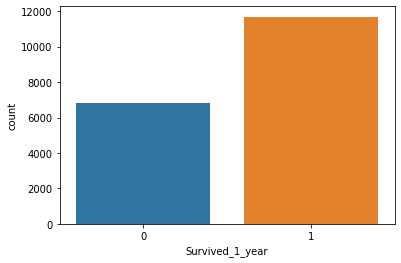

In [ ]:
sns.countplot(y_train)
plt.show()

There are 6000 + patients who did not survive after 1 year of treatment and almost 12000 patients who survived after 1 year of treatment. The ratio is 1:2 (approx). We can go ahead without class imbalance treatment as the difference is not highly imbalanced such as 1:10. However, feel free to experiment and see if class imbalance really helps or not.


**Box Plot**

A box plot is a great way to get a visual sense of an entire range of data. It can tell you about your outliers and what their values are. It can also tell you if your data is symmetrical, how tightly your data is grouped, and if and how your data is skewed.

Box plots divides data into its quartiles. The “box” shows a user the data set between the first and third quartiles.

The median gets drawn somewhere inside the box and then you see the most extreme non-outliers to finish the plot. Those lines are known as the “whiskers”. If there are any outliers then those can be plotted as well.

With box plots you can answer how diverse or uniform your data might be. You can identify what is normal and what is extreme. Box plots help give a shape to your data that is broad without sacrificing the ability to look at any piece and ask more questions.

It displays the five-number summary of a set of data. The five-number summary is:

*  minimum
*  first quartile (Q1)
*  median
*  third quartile (Q3)
*  maximum

Boxplot also helps you to check if there are any outliers in your data or not.

For reading about boxplot and outliers: https://towardsdatascience.com/ways-to-detect-and-remove-the-outliers-404d16608dba

Read more about Box Plots [here](https://towardsdatascience.com/understanding-boxplots-5e2df7bcbd51).

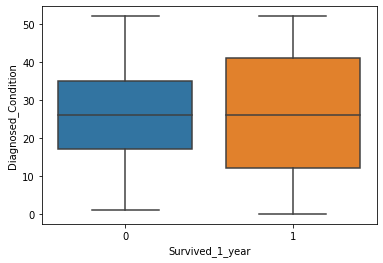

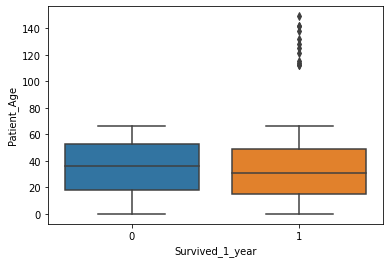

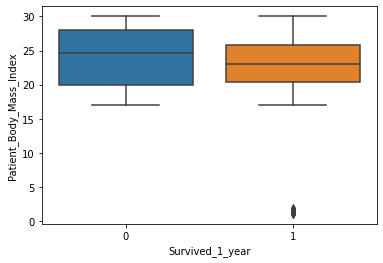

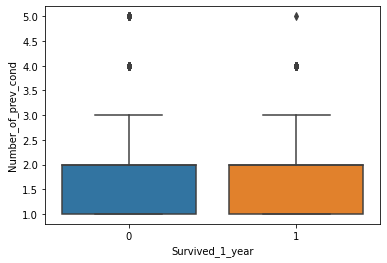

In [ ]:
numeric_data=X_train[['Diagnosed_Condition', 'Patient_Age', 'Patient_Body_Mass_Index', 'Number_of_prev_cond']]
for feature in numeric_data.columns:
  sns.boxplot(x=y_train, y=feature, data=numeric_data)
  plt.show()

We can also see there are some outliers in the columns - 'Patient_Age', 'Patient_Body_Mass_Index', and 'Number_of_prev_cond'. There are various ways to treat the outliers as mentioned in the article https://towardsdatascience.com/ways-to-detect-and-remove-the-outliers-404d16608dba. Here I have not treated any outliers.

 **Exercise:** Treat outliers and see if it improves the performance.

Following is a correlation analysis between the continuous varibles, visualized using a heatmap

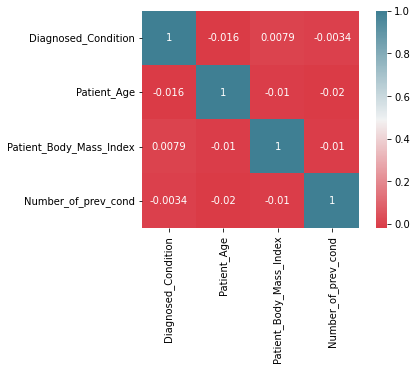

In [ ]:
colormap = sns.diverging_palette(10, 220, as_cmap = True)
sns.heatmap(numeric_data.corr(),
            cmap = colormap,
            square = True,
            annot = True)
plt.show()

Finally, we must look at the EDA for our categorical variables. However, before analyzing the categorical columns further, we will treat the missing values

In [ ]:
X_train.isnull().sum()

ID_Patient_Care_Situation      0
Diagnosed_Condition            0
Patient_ID                     0
Treated_with_drugs            12
Patient_Age                    0
Patient_Body_Mass_Index        0
Patient_Smoker                 0
Patient_Rural_Urban            0
Patient_mental_condition       0
A                            995
B                            995
C                            995
D                            995
E                            995
F                            995
Z                            995
Number_of_prev_cond          995
dtype: int64

#### *Filling Missing values*

In [ ]:
X_train['Treated_with_drugs']=X_train['Treated_with_drugs'].fillna(X_train['Treated_with_drugs'].mode()[0])

In [ ]:
X_train['A'].fillna(X_train['A'].mode()[0], inplace = True)
X_train['B'].fillna(X_train['B'].mode()[0], inplace = True)
X_train['C'].fillna(X_train['C'].mode()[0], inplace = True)
X_train['D'].fillna(X_train['D'].mode()[0], inplace = True)
X_train['E'].fillna(X_train['E'].mode()[0], inplace = True)
X_train['F'].fillna(X_train['F'].mode()[0], inplace = True)
X_train['Z'].fillna(X_train['Z'].mode()[0], inplace = True)

In [ ]:
X_train.isnull().sum()

ID_Patient_Care_Situation      0
Diagnosed_Condition            0
Patient_ID                     0
Treated_with_drugs             0
Patient_Age                    0
Patient_Body_Mass_Index        0
Patient_Smoker                 0
Patient_Rural_Urban            0
Patient_mental_condition       0
A                              0
B                              0
C                              0
D                              0
E                              0
F                              0
Z                              0
Number_of_prev_cond          995
dtype: int64

We can see that 995 values are missing from 'Number_of_prev_cond' column. We will fill these with the mode. 

**Why mode?** As per the data description this column's value is dependent on the seven columns - 'A', 'B', 'C', 'D', 'E', 'F', 'Z'. 

These columns have values either 0 or 1. Hence these seven columns are categorical columns. 

So the column 'Number_of_prev_cond' have discrete values from integers 0 to 7 and can be considered as categorical column as it has only 7 different values. Hence here we can fill the missing values with mode.


Idea way is to just sum up the values of A, B, C, D, E, F, Z

In [ ]:
X_train['Number_of_prev_cond'] = X_train['Number_of_prev_cond'].fillna(X_train['Number_of_prev_cond'].mode()[0])  # filling the missing value of 'Number_of_prev_cond'


In [ ]:
X_train.isnull().sum()

ID_Patient_Care_Situation    0
Diagnosed_Condition          0
Patient_ID                   0
Treated_with_drugs           0
Patient_Age                  0
Patient_Body_Mass_Index      0
Patient_Smoker               0
Patient_Rural_Urban          0
Patient_mental_condition     0
A                            0
B                            0
C                            0
D                            0
E                            0
F                            0
Z                            0
Number_of_prev_cond          0
dtype: int64

### Let's look at Categorical Data
Let's perform Exploratory Data Analysis on the Categorical data.
In the categorical_data variable we'll keep all the categorical features and remove the others.

Note that the features are not being removed from the main dataset - data. We'll select features with a feature selection technique later.

Now we can look at the distributions of our categorical variables

In [ ]:
categorical_data = data.drop(numeric_data.columns, axis=1)    # dropping the numerical columns from the dataframe 'data'
categorical_data.nunique()   # nunique() return you the number of unique values in each column/feature

ID_Patient_Care_Situation    23097
Patient_ID                   10570
Treated_with_drugs              32
Patient_Smoker                   3
Patient_Rural_Urban              2
Patient_mental_condition         1
A                                2
B                                2
C                                2
D                                2
E                                2
F                                2
Z                                2
Survived_1_year                  2
dtype: int64

In [ ]:
X_train.Treated_with_drugs.value_counts()

DX6                     6861
DX5                     1551
DX2                     1545
DX3                     1485
DX1                     1465
DX4                     1413
DX1 DX2                  353
DX1 DX3                  347
DX3 DX4                  345
DX4 DX5                  339
DX3 DX5                  339
DX1 DX5                  331
DX2 DX4                  330
DX1 DX4                  330
DX2 DX5                  311
DX2 DX3                  301
DX1 DX3 DX5               81
DX3 DX4 DX5               81
DX1 DX2 DX5               81
DX1 DX2 DX4               78
DX1 DX2 DX3               77
DX2 DX3 DX5               76
DX1 DX3 DX4               76
DX2 DX3 DX4               69
DX1 DX4 DX5               64
DX2 DX4 DX5               64
DX1 DX3 DX4 DX5           19
DX1 DX2 DX3 DX4           19
DX2 DX3 DX4 DX5           18
DX1 DX2 DX4 DX5           13
DX1 DX2 DX3 DX5           12
DX1 DX2 DX3 DX4 DX5        3
Name: Treated_with_drugs, dtype: int64

So 'Treated_with_drugs' column has 32 unique values while 'Patient_Smoker' has only 3 categorical values. 'Patient_mental_condition' column has only 1 categorical value.

#### **Pre-Processing and Data Cleaning of Categorical Variables**


We have discussed in our sessions that machine learning models accepts only numerical data. 'Treated_with_drugs' column is a categorical column and has values as combination of one or more drugs. Let's split all those combined drugs into individual drugs and create dummies for that.

In [ ]:
drugs = X_train['Treated_with_drugs'].str.get_dummies(sep=' ') # split all the entries separated by space and create dummy variable
drugs.head()

,DX1,DX2,DX3,DX4,DX5,DX6
3955,0,0,0,0,0,1
13205,0,0,0,0,0,1
14868,0,0,0,0,1,0
13249,1,0,1,0,0,0
8383,1,1,1,0,0,0


In [ ]:
X_train = pd.concat([X_train, drugs], axis=1)     # concat the two dataframes 'drugs' and 'data'
X_train = X_train.drop('Treated_with_drugs', axis=1)    # dropping the column 'Treated_with_drugs' as its values are now splitted into different columns

X_train.head()

,ID_Patient_Care_Situation,Diagnosed_Condition,Patient_ID,Patient_Age,Patient_Body_Mass_Index,Patient_Smoker,Patient_Rural_Urban,Patient_mental_condition,A,B,...,E,F,Z,Number_of_prev_cond,DX1,DX2,DX3,DX4,DX5,DX6
3955,30300,10,4842,37,22.673581,YES,RURAL,Stable,1.0,0.0,...,0.0,0.0,0.0,1.0,0,0,0,0,0,1
13205,2888,44,1024,11,29.883019,NO,URBAN,Stable,1.0,0.0,...,1.0,0.0,0.0,2.0,0,0,0,0,0,1
14868,3234,49,195,53,17.580741,YES,RURAL,Stable,0.0,0.0,...,1.0,0.0,0.0,1.0,0,0,0,0,1,0
13249,15704,27,291,22,21.468654,NO,URBAN,Stable,1.0,1.0,...,0.0,0.0,0.0,2.0,1,0,1,0,0,0
8383,10661,24,5543,62,29.204603,NO,URBAN,Stable,1.0,0.0,...,0.0,0.0,0.0,1.0,1,1,1,0,0,0


'Patient_Smoker' is also a categorical column and we need to create dummies for this too. If you observe the data, the column 'Patient_Smoker' has a category 'Cannot say'.

In [ ]:
X_train.Patient_Smoker.value_counts()

NO            10602
YES            7863
Cannot say       12
Name: Patient_Smoker, dtype: int64

There can be different ways to deal with the category 'Cannot say'. Here we will consider it as missing value and fill those entries with the mode value of the column.

In [ ]:
X_train.Patient_Smoker[X_train['Patient_Smoker'] == "Cannot say"] = 'NO'    # we already know 'NO' is the mode so directly changing the values 'Cannot say' to 'NO'

The column 'Patient_mental_condition' has only one category 'stable'. So we can drop this column as for every observation the entry here is 'stable'. This feature won’t be useful for making the prediction of the target variable as it doesn’t provide any useful insights of the data. Hence, It is better to remove this kind of features.

In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18477 entries, 3955 to 13126
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ID_Patient_Care_Situation  18477 non-null  int64  
 1   Diagnosed_Condition        18477 non-null  int64  
 2   Patient_ID                 18477 non-null  int64  
 3   Patient_Age                18477 non-null  int64  
 4   Patient_Body_Mass_Index    18477 non-null  float64
 5   Patient_Smoker             18477 non-null  object 
 6   Patient_Rural_Urban        18477 non-null  object 
 7   Patient_mental_condition   18477 non-null  object 
 8   A                          18477 non-null  float64
 9   B                          18477 non-null  float64
 10  C                          18477 non-null  float64
 11  D                          18477 non-null  float64
 12  E                          18477 non-null  float64
 13  F                          18477 non-null  

In [ ]:
X_train.drop('Patient_mental_condition', axis = 1, inplace=True)

Now let's convert the remaining categorical column to numerical using get_dummies() function of pandas (i.e. one hot encoding).

In [ ]:
X_train = pd.get_dummies(X_train, columns=['Patient_Smoker', 'Patient_Rural_Urban'])

In [ ]:
X_train.head()

,ID_Patient_Care_Situation,Diagnosed_Condition,Patient_ID,Patient_Age,Patient_Body_Mass_Index,A,B,C,D,E,...,DX1,DX2,DX3,DX4,DX5,DX6,Patient_Smoker_NO,Patient_Smoker_YES,Patient_Rural_Urban_RURAL,Patient_Rural_Urban_URBAN
3955,30300,10,4842,37,22.673581,1.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,1,0,1,1,0
13205,2888,44,1024,11,29.883019,1.0,0.0,0.0,0.0,1.0,...,0,0,0,0,0,1,1,0,0,1
14868,3234,49,195,53,17.580741,0.0,0.0,0.0,0.0,1.0,...,0,0,0,0,1,0,0,1,1,0
13249,15704,27,291,22,21.468654,1.0,1.0,0.0,0.0,0.0,...,1,0,1,0,0,0,1,0,0,1
8383,10661,24,5543,62,29.204603,1.0,0.0,0.0,0.0,0.0,...,1,1,1,0,0,0,1,0,0,1


In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18477 entries, 3955 to 13126
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ID_Patient_Care_Situation  18477 non-null  int64  
 1   Diagnosed_Condition        18477 non-null  int64  
 2   Patient_ID                 18477 non-null  int64  
 3   Patient_Age                18477 non-null  int64  
 4   Patient_Body_Mass_Index    18477 non-null  float64
 5   A                          18477 non-null  float64
 6   B                          18477 non-null  float64
 7   C                          18477 non-null  float64
 8   D                          18477 non-null  float64
 9   E                          18477 non-null  float64
 10  F                          18477 non-null  float64
 11  Z                          18477 non-null  float64
 12  Number_of_prev_cond        18477 non-null  float64
 13  DX1                        18477 non-null  

In [ ]:
X_train.head()

,Diagnosed_Condition,Patient_ID,Patient_Age,Patient_Body_Mass_Index,A,B,C,D,E,F,...,DX1,DX2,DX3,DX4,DX5,DX6,Patient_Smoker_NO,Patient_Smoker_YES,Patient_Rural_Urban_RURAL,Patient_Rural_Urban_URBAN
3955,10,4842,37,22.673581,1.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,1,0,1,1,0
13205,44,1024,11,29.883019,1.0,0.0,0.0,0.0,1.0,0.0,...,0,0,0,0,0,1,1,0,0,1
14868,49,195,53,17.580741,0.0,0.0,0.0,0.0,1.0,0.0,...,0,0,0,0,1,0,0,1,1,0
13249,27,291,22,21.468654,1.0,1.0,0.0,0.0,0.0,0.0,...,1,0,1,0,0,0,1,0,0,1
8383,24,5543,62,29.204603,1.0,0.0,0.0,0.0,0.0,0.0,...,1,1,1,0,0,0,1,0,0,1


As you can see there are no missing data now and all the data are of numerical type.

There are two ID columns - 'ID_Patient_Care_Situation' and 'Patient_ID'. We can think of removing these columns if these are randomly generated value and there is not any id repeated like we had done for the 'PassengerId' in Titanic Dataset. 'PassengerId' was randomly generated for each passenger and none of the ids were repeated. So let's check these two ids columns.

In [ ]:
print(X_train.ID_Patient_Care_Situation.nunique())     # nunique() gives you the count of unique values in the column
print(X_train.Patient_ID.nunique())

18477
9717


You can see there are 18477 unique 'ID_Patient_Care_Situation' and there are 23097 total observations in the dataset. So this column can be dropped.

Now, there are only 9717 unique values in the column 'Patient_ID'. This means there are some patient who came two or more times in the hospital because it is possible the same person was sick for two or more than two times (with different illness) and visited hospital for the treatment. And the same patient will have different caring condition for different diseases. 

So there are some useful information in the column - 'Patient_ID' and thus we will not drop this column.

In [ ]:
X_train.drop(['ID_Patient_Care_Situation'], axis =1, inplace=True)

## Test Data (X_test)
Tasks to be performed:
*  If missing values are there then fill the missing values with the same techniques that were used for training dataset
*  Convert categorical column to numerical
*  Predict the output
*  Evaluate the model

Why do we need to do the same procedure of filling missing values, data cleaning and data preprocessing on the new test data as it was done for the training and evaluation data?

**Ans:** Because our model has been trained on certain format of data and if we don't provide the testing data of the similar format, the model will give erroneous predictions and the accuracy/f1 score of the model will decrease. Also, if the model was build on 'n' number of features, while predicting on new test data you should always give the same number of features to the model. In this case if you provide different number of features while predicting the output, your ML model will throw a **ValueError** saying something like **'number of features given x; expecting n'**. Not confident about these statements? Well, as a data scientist you should always perform some experiment and observe the results.

In [ ]:
# copy the test data to a new variable test_new_data
test_new_data = X_test.copy()

In [ ]:
# take a look how the new test data look like
test_new_data.head()

,ID_Patient_Care_Situation,Diagnosed_Condition,Patient_ID,Treated_with_drugs,Patient_Age,Patient_Body_Mass_Index,Patient_Smoker,Patient_Rural_Urban,Patient_mental_condition,A,B,C,D,E,F,Z,Number_of_prev_cond
3652,32215,1,11894,DX1 DX2,22,29.033409,NO,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
13452,25391,20,1096,DX2,1,19.195376,NO,RURAL,Stable,1.0,1.0,0.0,0.0,1.0,0.0,0.0,3.0
8804,2542,24,2689,DX1 DX2 DX4,42,26.581994,YES,URBAN,Stable,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0
4842,10691,4,4670,DX6,55,29.730528,NO,URBAN,Stable,0.0,0.0,0.0,0.0,1.0,1.0,0.0,2.0
23083,1799,50,5322,DX4,52,18.827974,NO,RURAL,Stable,1.0,1.0,0.0,0.0,0.0,1.0,0.0,3.0


**Can you observe the test data here?** It is in the same format as our training data before performing any cleaning and preprocessing.

### Checking missing values

In [ ]:
test_new_data.isnull().sum()

ID_Patient_Care_Situation      0
Diagnosed_Condition            0
Patient_ID                     0
Treated_with_drugs             1
Patient_Age                    0
Patient_Body_Mass_Index        0
Patient_Smoker                 0
Patient_Rural_Urban            0
Patient_mental_condition       0
A                            240
B                            240
C                            240
D                            240
E                            240
F                            240
Z                            240
Number_of_prev_cond          240
dtype: int64

### Filling missing values

In [ ]:
test_new_data['Treated_with_drugs']=test_new_data['Treated_with_drugs'].fillna(test_new_data['Treated_with_drugs'].mode()[0])

In [ ]:
test_new_data['A'].fillna(test_new_data['A'].mode()[0], inplace = True)
test_new_data['B'].fillna(test_new_data['B'].mode()[0], inplace = True)
test_new_data['C'].fillna(test_new_data['C'].mode()[0], inplace = True)
test_new_data['D'].fillna(test_new_data['D'].mode()[0], inplace = True)
test_new_data['E'].fillna(test_new_data['E'].mode()[0], inplace = True)
test_new_data['F'].fillna(test_new_data['F'].mode()[0], inplace = True)
test_new_data['Z'].fillna(test_new_data['Z'].mode()[0], inplace = True)
test_new_data['Number_of_prev_cond'].fillna(test_new_data['Number_of_prev_cond'].mode()[0], inplace = True)

In [ ]:
test_new_data.isnull().sum()

ID_Patient_Care_Situation    0
Diagnosed_Condition          0
Patient_ID                   0
Treated_with_drugs           0
Patient_Age                  0
Patient_Body_Mass_Index      0
Patient_Smoker               0
Patient_Rural_Urban          0
Patient_mental_condition     0
A                            0
B                            0
C                            0
D                            0
E                            0
F                            0
Z                            0
Number_of_prev_cond          0
dtype: int64

#### Preprocessing and data cleaning: same as we did on training data

In [ ]:
drugs = test_new_data['Treated_with_drugs'].str.get_dummies(sep=' ') # split all the entries
drugs.head()

,DX1,DX2,DX3,DX4,DX5,DX6
3652,1,1,0,0,0,0
13452,0,1,0,0,0,0
8804,1,1,0,1,0,0
4842,0,0,0,0,0,1
23083,0,0,0,1,0,0


In [ ]:
test_new_data = pd.concat([test_new_data, drugs], axis=1)     # concat the two dataframes 'drugs' and 'data'
test_new_data = test_new_data.drop('Treated_with_drugs', axis=1)    # dropping the column 'Treated_with_drugs' as its values are splitted into different columns

test_new_data.head()

,ID_Patient_Care_Situation,Diagnosed_Condition,Patient_ID,Patient_Age,Patient_Body_Mass_Index,Patient_Smoker,Patient_Rural_Urban,Patient_mental_condition,A,B,...,E,F,Z,Number_of_prev_cond,DX1,DX2,DX3,DX4,DX5,DX6
3652,32215,1,11894,22,29.033409,NO,RURAL,Stable,1.0,0.0,...,0.0,0.0,0.0,1.0,1,1,0,0,0,0
13452,25391,20,1096,1,19.195376,NO,RURAL,Stable,1.0,1.0,...,1.0,0.0,0.0,3.0,0,1,0,0,0,0
8804,2542,24,2689,42,26.581994,YES,URBAN,Stable,1.0,0.0,...,0.0,0.0,0.0,2.0,1,1,0,1,0,0
4842,10691,4,4670,55,29.730528,NO,URBAN,Stable,0.0,0.0,...,1.0,1.0,0.0,2.0,0,0,0,0,0,1
23083,1799,50,5322,52,18.827974,NO,RURAL,Stable,1.0,1.0,...,0.0,1.0,0.0,3.0,0,0,0,1,0,0


In [ ]:
test_new_data.Patient_Smoker.value_counts()

NO            2644
YES           1975
Cannot say       1
Name: Patient_Smoker, dtype: int64

In [ ]:
test_new_data.Patient_Smoker[test_new_data['Patient_Smoker'] == "Cannot say"] = 'NO'    # we already know 'NO' is the mode so directly changing the values 'Cannot say' to 'NO'

The column 'Patient_mental_condition' has only one category 'stable'. So we can drop this column as for every observation the entry here is 'stable'.

In [ ]:
test_new_data.drop('Patient_mental_condition', axis = 1, inplace=True)

Now let's convert the categorical column to numerical using get_dummies() function of pandas (i.e. one hot encoding).

In [ ]:
test_new_data = pd.get_dummies(test_new_data, columns=['Patient_Smoker', 'Patient_Rural_Urban'])

In [ ]:
test_new_data.head()

,ID_Patient_Care_Situation,Diagnosed_Condition,Patient_ID,Patient_Age,Patient_Body_Mass_Index,A,B,C,D,E,...,DX1,DX2,DX3,DX4,DX5,DX6,Patient_Smoker_NO,Patient_Smoker_YES,Patient_Rural_Urban_RURAL,Patient_Rural_Urban_URBAN
3652,32215,1,11894,22,29.033409,1.0,0.0,0.0,0.0,0.0,...,1,1,0,0,0,0,1,0,1,0
13452,25391,20,1096,1,19.195376,1.0,1.0,0.0,0.0,1.0,...,0,1,0,0,0,0,1,0,1,0
8804,2542,24,2689,42,26.581994,1.0,0.0,1.0,0.0,0.0,...,1,1,0,1,0,0,0,1,0,1
4842,10691,4,4670,55,29.730528,0.0,0.0,0.0,0.0,1.0,...,0,0,0,0,0,1,1,0,0,1
23083,1799,50,5322,52,18.827974,1.0,1.0,0.0,0.0,0.0,...,0,0,0,1,0,0,1,0,1,0


In [ ]:
test_new_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4620 entries, 3652 to 16117
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ID_Patient_Care_Situation  4620 non-null   int64  
 1   Diagnosed_Condition        4620 non-null   int64  
 2   Patient_ID                 4620 non-null   int64  
 3   Patient_Age                4620 non-null   int64  
 4   Patient_Body_Mass_Index    4620 non-null   float64
 5   A                          4620 non-null   float64
 6   B                          4620 non-null   float64
 7   C                          4620 non-null   float64
 8   D                          4620 non-null   float64
 9   E                          4620 non-null   float64
 10  F                          4620 non-null   float64
 11  Z                          4620 non-null   float64
 12  Number_of_prev_cond        4620 non-null   float64
 13  DX1                        4620 non-null   i

As you can see there are no missing data now and all the data are of numerical type.

The column - 'ID_Patient_Care_Situation' is an ID. Here we can remove this column too as we did in training dataset.

In [ ]:
test_new_data.drop(['ID_Patient_Care_Situation'], axis =1, inplace=True)

In [ ]:
test_new_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4620 entries, 3652 to 16117
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Diagnosed_Condition        4620 non-null   int64  
 1   Patient_ID                 4620 non-null   int64  
 2   Patient_Age                4620 non-null   int64  
 3   Patient_Body_Mass_Index    4620 non-null   float64
 4   A                          4620 non-null   float64
 5   B                          4620 non-null   float64
 6   C                          4620 non-null   float64
 7   D                          4620 non-null   float64
 8   E                          4620 non-null   float64
 9   F                          4620 non-null   float64
 10  Z                          4620 non-null   float64
 11  Number_of_prev_cond        4620 non-null   float64
 12  DX1                        4620 non-null   int64  
 13  DX2                        4620 non-null   i

If you notice the training data i.e. 'data' dataframe, there is not any column named 'Patient_Smoker_Cannot say' while test data i.e. test_new_data has. We need to drop this column form test set.

### **Model Building**

We have seen from Exploratory Data Analysis that this is a classification problem as the target column 'Survived_1_year' has two values 0 - means the patient did not survive after one year of treatment, 1 - means the patient survived after one year of treatment. So we can use classification models for this problem. Some of the classification models are - Logistic Regression, Random Forest Classifier, Decision Tree Classifier, etc. However, we have used two of them - Logistic Regression and Random Forest Classifier.

### 1. Logistic Regression Model

In [ ]:
model = LogisticRegression(max_iter = 1000)     # The maximum number of iterations will be 1000. This will help you prevent from convergence warning.
model.fit(X_train,y_train)

LogisticRegression(max_iter=1000)

### Model Evaluation

In [ ]:
f1_score(y_test, model.predict(test_new_data))

0.7865745945077885

### 2. Random Forest

In [ ]:
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score, f1_score
from sklearn.ensemble import RandomForestClassifier

In [ ]:
forest = RandomForestClassifier(random_state=1, n_estimators=1000, max_depth=5)
 
forest.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, n_estimators=1000, random_state=1)

### Model Evaluation

In [ ]:
f1_score(y_test, forest.predict(test_new_data))

0.8242056522433339

LogisticRegression 78% < RandomForestClassifier 82%

### 3. Random Forest and Boruta

Boruta is an all-relevant feature selection method. Unlike other techniques that select small set of features to minimize the error, Boruta tries to capture all the important and interesting features you might have in your dataset with respect to the target variable.

Boruta by default uses random forest although it works with other algorithms like LightGBM, XGBoost etc.

You can install Boruta with the command

pip install Boruta

In [ ]:
!pip install Boruta

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 56 kB 5.2 MB/s 


In [ ]:
from boruta import BorutaPy

In [ ]:
rfc = RandomForestClassifier(random_state=1, n_estimators=1000, max_depth=5)
boruta_selector = BorutaPy(rfc, n_estimators='auto', verbose=2, random_state=1)   # initialize the boruta selector
boruta_selector.fit(np.array(X_train), np.array(y_train))       # fitting the boruta selector to get all relavent features. 
# NOTE: BorutaPy accepts numpy arrays only.

Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	22
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	22
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	22
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	22
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	22
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	22
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	22
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	17
Tentative: 	2
Rejected: 	3
Iteration: 	9 / 100
Confirmed: 	17
Tentative: 	2
Rejected: 	3
Iteration: 	10 / 100
Confirmed: 	17
Tentative: 	2
Rejected: 	3
Iteration: 	11 / 100
Confirmed: 	17
Tentative: 	2
Rejected: 	3
Iteration: 	12 / 100
Confirmed: 	17
Tentative: 	2
Rejected: 	3
Iteration: 	13 / 100
Confirmed: 	17
Tentative: 	2
Rejected: 	3
Iteration: 	14 / 100
Confirmed: 	17
Tentative: 	2
Rejected: 	3
Iteration: 	15 / 100
Confirmed: 	17
Tentative: 	2
Rejected: 	3
Iteration: 	16 / 100
Confirmed: 	17
Tentative: 	2
Rejected: 	3
I

BorutaPy(estimator=RandomForestClassifier(max_depth=5, n_estimators=123,
                                          random_state=RandomState(MT19937) at 0x7F356EB75D10),
         n_estimators='auto',
         random_state=RandomState(MT19937) at 0x7F356EB75D10, verbose=2)

In [ ]:
print("Selected Features: ", boruta_selector.support_)    # check selected features
 

print("Ranking: ",boruta_selector.ranking_)               # check ranking of features

print("No. of significant features: ", boruta_selector.n_features_)

Selected Features:  [ True  True  True  True  True  True False  True False False False  True
  True  True  True  True  True  True  True  True  True  True]
Ranking:  [1 1 1 1 1 1 2 1 3 5 4 1 1 1 1 1 1 1 1 1 1 1]
No. of significant features:  18


In [ ]:
X_train.head()

,Diagnosed_Condition,Patient_ID,Patient_Age,Patient_Body_Mass_Index,A,B,C,D,E,F,...,DX1,DX2,DX3,DX4,DX5,DX6,Patient_Smoker_NO,Patient_Smoker_YES,Patient_Rural_Urban_RURAL,Patient_Rural_Urban_URBAN
3955,10,4842,37,22.673581,1.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,1,0,1,1,0
13205,44,1024,11,29.883019,1.0,0.0,0.0,0.0,1.0,0.0,...,0,0,0,0,0,1,1,0,0,1
14868,49,195,53,17.580741,0.0,0.0,0.0,0.0,1.0,0.0,...,0,0,0,0,1,0,0,1,1,0
13249,27,291,22,21.468654,1.0,1.0,0.0,0.0,0.0,0.0,...,1,0,1,0,0,0,1,0,0,1
8383,24,5543,62,29.204603,1.0,0.0,0.0,0.0,0.0,0.0,...,1,1,1,0,0,0,1,0,0,1


So boruta has selected 18 relavent features. (The features with a ranking of 1 are selected). 

Let's visualise it better in the form of a table

#### Displaying features rank wise

In [ ]:
selected_rf_features = pd.DataFrame({'Feature':list(X_train.columns),
                                      'Ranking':boruta_selector.ranking_})
selected_rf_features.sort_values(by='Ranking')

,Feature,Ranking
0,Diagnosed_Condition,1
19,Patient_Smoker_YES,1
18,Patient_Smoker_NO,1
17,DX6,1
16,DX5,1
15,DX4,1
14,DX3,1
13,DX2,1
12,DX1,1
11,Number_of_prev_cond,1


#### Create a new subset of the data with only the selected features

In [ ]:
X_important_train = boruta_selector.transform(np.array(X_train))
X_important_test = boruta_selector.transform(np.array(test_new_data))

#### Build the model with selected features

In [ ]:
# Create a new random forest classifier for the most important features
rf_important = RandomForestClassifier(random_state=1, n_estimators=1000, n_jobs = -1)

# Train the new classifier on the new dataset containing the most important features
rf_important.fit(X_important_train, y_train)

RandomForestClassifier(n_estimators=1000, n_jobs=-1, random_state=1)

### Model Evaluaiton

In [ ]:
f1_score(y_test, rf_important.predict(X_important_test))

0.8524813052345344

**85 % with Boruta feature Selection which is a better Score than previous which was 82% ... so we have a boost of 3%**

### Hyper Parameter Tunning

Well we have chosen some of the parameters randomly like max_depth, n_estimators. There are many other parameters related to Random Forest model.If you remember we had discussed in our session 'Performance Evaluation' about Hyper parameter tunning. Hyper parameter tunnning helps you to choose a set of  optimal parameters for a model. So let's try if this helps us to further improve the performance of the model. 

Grid Search helps you to find the optimal parameter for a model.

In [ ]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True, False],
    'max_depth': [5, 10, 15],
    'n_estimators': [500, 1000]}

In [ ]:
rf = RandomForestClassifier(random_state = 1)

# Grid search cv
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 2, n_jobs = -1, verbose = 2)

In [ ]:
grid_search.fit(X_important_train, y_train)

Fitting 2 folds for each of 12 candidates, totalling 24 fits


GridSearchCV(cv=2, estimator=RandomForestClassifier(random_state=1), n_jobs=-1,
             param_grid={'bootstrap': [True, False], 'max_depth': [5, 10, 15],
                         'n_estimators': [500, 1000]},
             verbose=2)

In [ ]:
grid_search.best_params_

{'bootstrap': True, 'max_depth': 15, 'n_estimators': 1000}

### Model Evaluation

In [ ]:
f1_score(y_test, grid_search.predict(X_important_test))

0.8563247431362642

RFC with Hyper Params Tunning 85.63% while RFC with Boruta feature Selection 
85.24%

### Model Performance Comparison

In [ ]:
models = {'Logistic Regression': model, 'Random Forest Classifier': forest, 'Random Forest with Boruta Selector': rf_important, 
          'Hyperparameter Tunning | Random Forest | Boruta': grid_search}

test_data = [test_new_data, test_new_data, X_important_test, X_important_test]
model_performance = []
exp = 1
for key, value in models.items():
  model_performance.append([exp, key, f1_score(y_test, value.predict(test_data[exp-1]))])
  exp += 1

In [ ]:
df = pd.DataFrame(model_performance, columns=['experiment no.:', 'experiment name', 'f1 score'])
df

,experiment no.:,experiment name,f1 score
0,1,Logistic Regression,0.786575
1,2,Random Forest Classifier,0.824206
2,3,Random Forest with Boruta Selector,0.852481
3,4,Hyperparameter Tunning | Random Forest | Boruta,0.856325


# Conclusion
* It is clearly observable that how the f1 scores increased from logistic regression to random forest, random forest with full features to random forest on the selected features using Boruta. 
* Then again the f1 score increased with Hyper parameter tunning.
* Also this is one of the approach to solve this problem. There can be many other approaches to solve this problem.
* We could also try standardizing and normalizing the data or some other algorithms and so on....
* Well you should try standardizing or normalizing the data and then observe the difference in f1 score.
* Also try doing using Decision Tree.
